En este proyecto se trabajara principalmente con el proceso de limpieza de datos, y  tratamiento de valores que afecten nuestra data, como resultado se dejara una tabla lista para distintos fines de analisis

In [1]:
#importe de librerias necesarias
import pandas as pd

In [2]:
#importe del archivo a limpiar
from google.colab import files
upload = files.upload()

Saving Limpieza de datos YT.xlsx to Limpieza de datos YT.xlsx


In [3]:
df = pd.read_excel('/content/Limpieza de datos YT.xlsx',header=2)
df

,Unnamed: 0,Unnamed: 1,COD,Nombres,Primer apellido,Segundo apellido,Género,Departamento,Salario,Fecha inicio,Tiempo,Tipo de contrato,País de origen,Email
0,NaN,NaN,3751,abelard davidek,Henstridge,Davidek,M,Engineering,$1944778.73,04/18/2020,False,True,China,NaN
1,NaN,NaN,9709,adina prickett,Planke,Prickett,F,Business Development,$4034920.53,01/20/2015,True,False,Spain,NaN
2,NaN,NaN,1319,aguistin gutsell,Shepperd,Gutsell,M,Accounting,$4448553.53,01/16/2012,True,False,Argentina,NaN
3,NaN,NaN,5516,alano stoute,Brick,Stoute,M,Engineering,$3703534.33,03/21/2015,True,False,China,NaN
4,NaN,NaN,3359,alister wraggs,Jaggers,Wraggs,M,Services,$2211818.29,02/25/2021,False,False,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,NaN,7471,wilbur ruddell,Broschke,Ruddell,M,Accounting,$2710734.82,03/18/2011,False,True,Japan,NaN
246,NaN,NaN,9385,wilmar bodell,Whapple,Bodell,F,Support,$3661205.12,2017-06-06 00:00:00,False,True,Japan,NaN
247,NaN,NaN,9385,wilmar bodell,Whapple,Bodell,F,Support,$3661205.12,2017-06-06 00:00:00,False,True,Japan,NaN
248,NaN,NaN,9632,yanaton maude,Southcoat,Maude,F,Legal,$2803732.44,05/24/2019,False,True,China,NaN


In [4]:
#Usaremos la columna COD como index
df.set_index(df['COD'],inplace=True)
df.head(3)

,Unnamed: 0,Unnamed: 1,COD,Nombres,Primer apellido,Segundo apellido,Género,Departamento,Salario,Fecha inicio,Tiempo,Tipo de contrato,País de origen,Email
COD,,,,,,,,,,,,,,
3751,NaN,NaN,3751,abelard davidek,Henstridge,Davidek,M,Engineering,$1944778.73,04/18/2020,False,True,China,NaN
9709,NaN,NaN,9709,adina prickett,Planke,Prickett,F,Business Development,$4034920.53,01/20/2015,True,False,Spain,NaN
1319,NaN,NaN,1319,aguistin gutsell,Shepperd,Gutsell,M,Accounting,$4448553.53,01/16/2012,True,False,Argentina,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 3751 to 4307
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Unnamed: 1        0 non-null      float64
 2   COD               250 non-null    int64  
 3   Nombres           250 non-null    object 
 4   Primer apellido   250 non-null    object 
 5   Segundo apellido  250 non-null    object 
 6   Género            250 non-null    object 
 7   Departamento      244 non-null    object 
 8   Salario           244 non-null    object 
 9   Fecha inicio      250 non-null    object 
 10  Tiempo            244 non-null    object 
 11  Tipo de contrato  250 non-null    bool   
 12  País de origen    244 non-null    object 
 13  Email             0 non-null      float64
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 27.6+ KB


In [6]:
df.isnull().sum()

Unnamed: 0          250
Unnamed: 1          250
COD                   0
Nombres               0
Primer apellido       0
Segundo apellido      0
Género                0
Departamento          6
Salario               6
Fecha inicio          0
Tiempo                6
Tipo de contrato      0
País de origen        6
Email               250
dtype: int64

Al ver la columna Unnamed: 0, Unnamed: 1, Email, cuyos valores nulos son demasiados, se opta por eliminar estas 3 columnas

In [7]:
columns_drop = [0,1,2,13]
df.drop(df.columns[columns_drop],axis=1,inplace=True)
df

,Nombres,Primer apellido,Segundo apellido,Género,Departamento,Salario,Fecha inicio,Tiempo,Tipo de contrato,País de origen
COD,,,,,,,,,,
3751,abelard davidek,Henstridge,Davidek,M,Engineering,$1944778.73,04/18/2020,False,True,China
9709,adina prickett,Planke,Prickett,F,Business Development,$4034920.53,01/20/2015,True,False,Spain
1319,aguistin gutsell,Shepperd,Gutsell,M,Accounting,$4448553.53,01/16/2012,True,False,Argentina
5516,alano stoute,Brick,Stoute,M,Engineering,$3703534.33,03/21/2015,True,False,China
3359,alister wraggs,Jaggers,Wraggs,M,Services,$2211818.29,02/25/2021,False,False,China
...,...,...,...,...,...,...,...,...,...,...
7471,wilbur ruddell,Broschke,Ruddell,M,Accounting,$2710734.82,03/18/2011,False,True,Japan
9385,wilmar bodell,Whapple,Bodell,F,Support,$3661205.12,2017-06-06 00:00:00,False,True,Japan
9385,wilmar bodell,Whapple,Bodell,F,Support,$3661205.12,2017-06-06 00:00:00,False,True,Japan


**Limpieza de la columna SALARIO**

In [8]:
df['Salario'] = df['Salario'].str.split('$').str[1]

In [9]:
df['Salario'] = df['Salario'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 3751 to 4307
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombres           250 non-null    object 
 1   Primer apellido   250 non-null    object 
 2   Segundo apellido  250 non-null    object 
 3   Género            250 non-null    object 
 4   Departamento      244 non-null    object 
 5   Salario           244 non-null    float64
 6   Fecha inicio      250 non-null    object 
 7   Tiempo            244 non-null    object 
 8   Tipo de contrato  250 non-null    bool   
 9   País de origen    244 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 19.8+ KB


**Limpieza de la columna FECHA INICIO**

In [11]:
df['Fecha inicio'] = pd.to_datetime(df['Fecha inicio'])

**Limpieza de la columna GENERO**

In [12]:
df['Género'].unique()

array(['M', 'F'], dtype=object)

In [13]:
diccionario_genero = {'M':'Masculino','F':'Femenino'}
df['Género'] = df['Género'].map(diccionario_genero)

**Limpieza de la columna TIPO DE CONTRATO**

In [14]:
df['Tipo de contrato'].unique()

array([ True, False])

In [15]:
dicionario_contrato = {True:'Termino_Fijo',False:'Obra_Labor'}
df['Tipo de contrato'] = df['Tipo de contrato'].map(dicionario_contrato)

**Limpieza de la columna TIEMPO**

In [16]:
df['Tiempo'].unique()

array([False, True, nan], dtype=object)

In [17]:
diccionario_tiempo = {True:'Completo',False:'Ocacional'}
df['Tiempo'] = df['Tiempo'].map(diccionario_tiempo)

**Limpieza de la columna DEPARTAMENTO**

In [18]:
df['Departamento'].unique()

array(['Engineering', 'Business Development', 'Accounting', 'Services',
       'Legal', 'Training', 'Product Management', 'Marketing', 'Support',
       nan, 'Human Resources', 'Research and Development', 'Sales',
       '   Sales', '    Services'], dtype=object)

In [19]:
df['Departamento'] = df['Departamento'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [20]:
df['Departamento'] = df['Departamento'].str.lower()

In [21]:
df['Departamento'].unique()

array(['engineering', 'business development', 'accounting', 'services',
       'legal', 'training', 'product management', 'marketing', 'support',
       nan, 'human resources', 'research and development', 'sales'],
      dtype=object)

**Limpieza de la columna PAIS DE ORIGEN**

In [22]:
df['País de origen'].unique()

array(['China', 'Spain', 'Argentina', 'Japan', nan, 'Chile', 'Colombia',
       'Mexico', 'Colommbia', 'Ecuador', 'Italy', 'Chhhina', 'Mexxico',
       'Argenbtina'], dtype=object)

In [23]:
diccionario_pais = {'China':'China', 'Spain':'España', 'Argentina':'Argentina', 'Japan':'Japon', 'Chile':'Chile', 'Colombia':'Colombia',
       'Mexico':'Mexico', 'Colommbia':'Colombia', 'Ecuador':'Ecuador', 'Italy':'Italia', 'Chhhina':'China', 'Mexxico':'Mexico',
       'Argenbtina':'Argentina'}

df['País de origen'] = df['País de origen'].map(diccionario_pais)

**Valores nan**

In [24]:
#cantidad de valores nan
df.isnull().sum()

Nombres             0
Primer apellido     0
Segundo apellido    0
Género              0
Departamento        6
Salario             6
Fecha inicio        0
Tiempo              6
Tipo de contrato    0
País de origen      6
dtype: int64

Se opta por eliminar estos valores nan

In [25]:
df = df.dropna()

In [26]:
#cantidad de valores nan
df.isnull().sum()

Nombres             0
Primer apellido     0
Segundo apellido    0
Género              0
Departamento        0
Salario             0
Fecha inicio        0
Tiempo              0
Tipo de contrato    0
País de origen      0
dtype: int64

**Renombrar de las columnas**

In [27]:
df.columns

Index(['Nombres', 'Primer apellido', 'Segundo apellido', 'Género',
       'Departamento', 'Salario', 'Fecha inicio', 'Tiempo', 'Tipo de contrato',
       'País de origen'],
      dtype='object')

In [28]:
diccionario_columnas = {'Nombres':'nombre', 'Primer apellido':'primer_apellido', 'Segundo apellido':'segundo_apellido', 'Género':'genero',
       'Departamento':'departamento', 'Salario':'salario', 'Fecha inicio':'fecha_inicio', 'Tiempo':'tiempo', 'Tipo de contrato':'tipo_contrato',
       'País de origen':'nacionalidad'}

df.rename(columns=diccionario_columnas,inplace=True)

<ipython-input-28-ef2c84c84191>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=diccionario_columnas,inplace=True)


In [29]:
df

,nombre,primer_apellido,segundo_apellido,genero,departamento,salario,fecha_inicio,tiempo,tipo_contrato,nacionalidad
COD,,,,,,,,,,
3751,abelard davidek,Henstridge,Davidek,Masculino,engineering,1944778.73,2020-04-18,Ocacional,Termino_Fijo,China
9709,adina prickett,Planke,Prickett,Femenino,business development,4034920.53,2015-01-20,Completo,Obra_Labor,España
1319,aguistin gutsell,Shepperd,Gutsell,Masculino,accounting,4448553.53,2012-01-16,Completo,Obra_Labor,Argentina
5516,alano stoute,Brick,Stoute,Masculino,engineering,3703534.33,2015-03-21,Completo,Obra_Labor,China
3359,alister wraggs,Jaggers,Wraggs,Masculino,services,2211818.29,2021-02-25,Ocacional,Obra_Labor,China
...,...,...,...,...,...,...,...,...,...,...
7471,wilbur ruddell,Broschke,Ruddell,Masculino,accounting,2710734.82,2011-03-18,Ocacional,Termino_Fijo,Japon
9385,wilmar bodell,Whapple,Bodell,Femenino,support,3661205.12,2017-06-06,Ocacional,Termino_Fijo,Japon
9385,wilmar bodell,Whapple,Bodell,Femenino,support,3661205.12,2017-06-06,Ocacional,Termino_Fijo,Japon


**Eliminar valores repetidos**

In [30]:
df = df.drop_duplicates()

**Valores atipicos**

<Axes: >

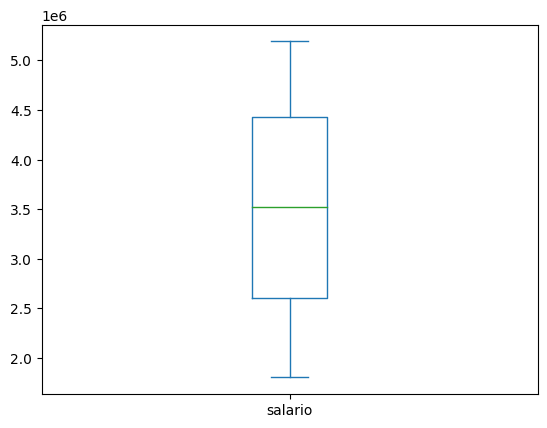

In [31]:
df['salario'].plot(kind='box')

In [32]:
q1 = df['salario'].quantile(0.25)
q3 = df['salario'].quantile(0.75)
iiq = q3-q1
li = q1-1.5*iiq
ls = q3+1.5*iiq

In [33]:
filtro = ((df['salario']>=li)&(df['salario']<=ls))
df[filtro]

,nombre,primer_apellido,segundo_apellido,genero,departamento,salario,fecha_inicio,tiempo,tipo_contrato,nacionalidad
COD,,,,,,,,,,
3751,abelard davidek,Henstridge,Davidek,Masculino,engineering,1944778.73,2020-04-18,Ocacional,Termino_Fijo,China
9709,adina prickett,Planke,Prickett,Femenino,business development,4034920.53,2015-01-20,Completo,Obra_Labor,España
1319,aguistin gutsell,Shepperd,Gutsell,Masculino,accounting,4448553.53,2012-01-16,Completo,Obra_Labor,Argentina
5516,alano stoute,Brick,Stoute,Masculino,engineering,3703534.33,2015-03-21,Completo,Obra_Labor,China
3359,alister wraggs,Jaggers,Wraggs,Masculino,services,2211818.29,2021-02-25,Ocacional,Obra_Labor,China
...,...,...,...,...,...,...,...,...,...,...
1943,whitney warin,Hefforde,Warin,Masculino,engineering,3428454.32,2016-10-28,Completo,Termino_Fijo,China
7471,wilbur ruddell,Broschke,Ruddell,Masculino,accounting,2710734.82,2011-03-18,Ocacional,Termino_Fijo,Japon
9385,wilmar bodell,Whapple,Bodell,Femenino,support,3661205.12,2017-06-06,Ocacional,Termino_Fijo,Japon


Se descartan valores atipicos, y la data esta lista para ser analizada